# Interpolating Polynomials

In [1]:
from Polynomial import *
import matplotlib.pyplot as plt
import numpy as np

## Question 1
Find the interpolating polynomial of degree 3 which passes through (1,29), (-1,-35), (2,31), and (-3,-19).

In [2]:
poly = Polynomial(
    Point(1, 29),
    Point(-1, -35),
    Point(2, 31),
    Point(-3, -19))
print(poly)

-4x^3 - 2x^2 + 36x - 1


In [4]:
poly = Polynomial(
    Point(-1, 0.5),
    Point(0, 1),
    Point(1, 2),
    Point(2, 4),
    Point(3, 8))
print(poly)

0.021x^4 + 0.042x^3 + 0.229x^2 + 0.708x + 1


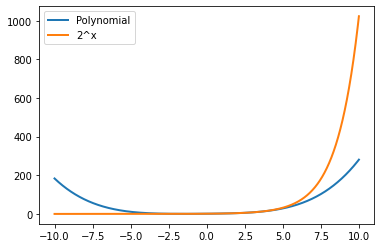

In [11]:
x = np.arange(-10, 10, 0.001)
y1 = poly.evaluate(x)
y2 = 2 ** x

fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.plot(x, y2, linewidth=2.0)

plt.legend(["Polynomial", "2^x"])

plt.show()


## Question 3
Interpolating polynomials allow us to estimate values of an unknown function between known data points. For example, consider the data in Table 1, which was taken from Car and Driver magazine1. Five sport utility vehicles were tested for their acceleration: the data reported were the time it took each vehicle to go from 0 to 30 m.p.h., from 0 to 60 m.p.h., and from 0 to 90 m.p.h. For each vehicle, write the third degree interpolating polynomial and use that polynomial to find an estimate for the time it would take the vehicle to accelerate from 0 m.p.h. to 50 m.p.h. Note: to obtain the polynomials, it may be easier to write the data in the form suggested by Table 2.

| Vehicle           | 0-30 mph | 0-60 mph | 0-90 mph |
|-------------------|----------|----------|----------|
| Honda CR - VEX    | 3.1      | 10.3     | 30.1     |
| Jeep Cherokee SE  | 3.2      | 12       | 38.2     |
| Kia Sportage      | 4.2      | 12.8     | 38.7     |
| Subaru Forester L | 2.8      | 9.5      | 22.7     |
| Toyota RAV4       | 3.0      | 10.2     | 31.7     |
Table 1: Acceleration Times (seconds) for various models of automobiles

|-------------------|----------|----------|-----------------------|
| Honda CR - VEX    | Time      |0| 3.1   | 10.3     | 30.1 |
|                   | Velocity  |0| 30    | 60     | 90    |
| Jeep Cherokee SE  | Time      | 0|3.2   | 12     | 38.2     |
|                   | Velocity  |0| 30    | 60     | 90     |
| Kia Sportage      | Time      | 0|4.2   | 12.8     | 38.7    |
|                   | Velocity  |0| 30    | 60    | 90  |
| Subaru Forester L | Time      |0| 2.8   | 9.5     | 22.7     |
|                   | Velocity  |0| 30    | 60     | 90     |
| Toyota RAV4       | Time      |0| 3.0   | 10.2     | 31.7     |
|                   | Velocity  |0| 30    | 60     | 90    |
Table 2: Elapsed Time (seconds) and Velocities (m.p.h.) for various models of automobiles

In [11]:
honda_velocity = Polynomial(Point(0, 0), Point(3.1, 30), Point(10.3, 60), Point(30.1, 90))
print('HONDA V(t) =', honda_velocity)
honda_fifty = Polynomial.polynomial_sum(Polynomial(Point(0, -50)), honda_velocity)
print(f'The Honda reaches a velocity of 50 mph at {honda_fifty.find_roots_range(0, 15)[0]} seconds\n')

jeep_velocity = Polynomial(Point(0, 0), Point(3.2, 30), Point(12, 60), Point(38.2, 90))
print('JEEP V(t) =', jeep_velocity)
jeep_fifty = Polynomial.polynomial_sum(Polynomial(Point(0, -50)), jeep_velocity)
print(f'The Jeep reaches a velocity of 50 mph at {jeep_fifty.find_roots_range(0, 15)[0]} seconds\n')

kia_velocity = Polynomial(Point(0, 0), Point(4.2, 30), Point(12.8, 60), Point(38.7, 90))
print('KIA V(t) =', kia_velocity)
kia_fifty = Polynomial.polynomial_sum(Polynomial(Point(0, -50)), kia_velocity)
print(f'The Honda reaches a velocity of 50 mph at {kia_fifty.find_roots_range(0, 15)[0]} seconds\n')

subaru_velocity = Polynomial(Point(0, 0), Point(2.8, 30), Point(9.5, 60), Point(22.7, 90))
print('SUBARU V(t) =', subaru_velocity)
subaru_fifty = Polynomial.polynomial_sum(Polynomial(Point(0, -50)), subaru_velocity)
print(f'The Subaru reaches a velocity of 50 mph at {subaru_fifty.find_roots_range(0, 15)[0]} seconds\n')

toyota_velocity = Polynomial(Point(0, 0), Point(3.0, 30), Point(10.2, 60), Point(31.7, 90))
print('TOYOTA V(t) =', toyota_velocity)
toyota_fifty = Polynomial.polynomial_sum(Polynomial(Point(0, -50)), toyota_velocity)
print(f'The Toyota reaches a velocity of 50 mph at {toyota_fifty.find_roots_range(0, 15)[0]} seconds\n')


HONDA V(t) = 0.015x^3 - 0.729x^2 + 11.799x + 0
The Honda reaches a velocity of 50 mph at 6.534 seconds

JEEP V(t) = 0.011x^3 - 0.669x^2 + 11.401x + 0
The Jeep reaches a velocity of 50 mph at 6.764 seconds

KIA V(t) = 0.006x^3 - 0.381x^2 + 8.645x + 0
The Honda reaches a velocity of 50 mph at 8.681 seconds

SUBARU V(t) = 0.024x^3 - 0.952x^2 + 13.192x + 0
The Subaru reaches a velocity of 50 mph at 5.985 seconds

TOYOTA V(t) = 0.015x^3 - 0.77x^2 + 12.175x + 0
The Toyota reaches a velocity of 50 mph at 6.325 seconds



## Question 4
In the problem above, consider the total distance each vehicle will travel while it accelerates from 0 to 90 m.p.h. That quantity can be calculated by integrating the velocity function v(t) for the vehicle. There is one small problem to overcome first. In this problem v(t) is measured in miles per hour and t is measured in seconds, so v(t) should be converted to miles per second before proceeding. The velocity function in miles per second is v(t)/3600. The distance traveled by the vehicle would be ∫T v(t) 3600dt, where T is the time at which the vehicle reaches 90 m.p.h. The real 0 velocity function v(t) is not known in this case, but interpolating polynomials for v(t) are available which should approximate v(t). Use the interpolating polynomials you generated in the previous exercise to approximate the distance needed for each vehicle to accelerate from 0 to 90 m.p.h.

In [25]:
honda_position = honda_velocity.get_integral(C=0)
poly_ninety = honda_velocity.polynomial_sum(Polynomial(Point(0, -90)))
ninety_miles_time = poly_ninety.find_roots_range(0, 50)[0]

displacement = honda_position.evaluate(ninety_miles_time)
print(f'The Honda travels {displacement/3600} miles while accelerating to 90 mph')


jeep_position = jeep_velocity.get_integral(C=0)
poly_ninety = jeep_velocity.polynomial_sum(Polynomial(Point(0, -90)))
ninety_miles_time = poly_ninety.find_roots_range(0, 50)[0]

displacement = jeep_position.evaluate(ninety_miles_time)
print(f'The Jeep travels {displacement/3600} miles while accelerating to 90 mph')


kia_position = kia_velocity.get_integral(C=0)
poly_ninety = kia_velocity.polynomial_sum(Polynomial(Point(0, -90)))
ninety_miles_time = poly_ninety.find_roots_range(0, 50)[0]

displacement = kia_position.evaluate(ninety_miles_time)
print(f'The Kia travels {displacement/3600} miles while accelerating to 90 mph')


subaru_position = subaru_velocity.get_integral(C=0)
poly_ninety = subaru_velocity.polynomial_sum(Polynomial(Point(0, -90)))
ninety_miles_time = poly_ninety.find_roots_range(0, 50)[0]

displacement = subaru_position.evaluate(ninety_miles_time)
print(f'The Subaru travels {displacement/3600} miles while accelerating to 90 mph')


toyota_position = toyota_velocity.get_integral(C=0)
poly_ninety = toyota_velocity.polynomial_sum(Polynomial(Point(0, -90)))
ninety_miles_time = poly_ninety.find_roots_range(0, 50)[0]

displacement = toyota_position.evaluate(ninety_miles_time)
print(f'The Toyota travels {displacement/3600} miles while accelerating to 90 mph')

The Honda travels 0.47000504439644275 miles while accelerating to 90 mph
The Jeep travels 0.5304928111282531 miles while accelerating to 90 mph
The Kia travels 0.6294631796429101 miles while accelerating to 90 mph
The Subaru travels 0.3561179182821022 miles while accelerating to 90 mph
The Toyota travels 0.48005447524155137 miles while accelerating to 90 mph


## Question 5
One major issue in using interpolating polynomials can be called "goodness of fit." In fitting a polynomial through given data points, it is assumed that there ought to be a polynomial relationship between the independent and dependent variables. Question 2 showed that is not always the case. Use MATLAB to plot the interpolating polynomials you generated in Question 3. Do you believe there is a polynomial relationship between elapsed time and the velocity of the vehicles? What evidence do you have to support your conclusion?